In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [2]:
max_features = 1000
imdb.load_data(num_words=max_features)

((array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 

In [6]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (25000,), Training labels shape: (25000,)
Testing data shape: (25000,), Testing labels shape: (25000,)


In [7]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [8]:
split_index = int(0.8 * len(X))
X_train = X[:split_index]
y_train = y[:split_index]

X_test = X[split_index:]
y_test = y[split_index:]

In [9]:
print("Training samples : ", len(X_train))
print("Testing samples : ", len(y_test))

Training samples :  40000
Testing samples :  10000


In [10]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 200

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print(X_train.shape)

(40000, 200)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=32))

model.add(LSTM(128, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 114561 (447.50 KB)
Trainable params: 114561 (447.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
EarlyStopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [15]:
history  = model.fit(X_train, 
                     y_train, 
                     epochs=10, 
                     batch_size=64, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping])

Epoch 1/10
500/500 [==============================] - 210s 421ms/step - loss: 0.3459 - accuracy: 0.8549 - val_loss: 0.3515 - val_accuracy: 0.8456
Epoch 2/10
500/500 [==============================] - 183s 366ms/step - loss: 0.3283 - accuracy: 0.8616 - val_loss: 0.3642 - val_accuracy: 0.8428
Epoch 3/10
500/500 [==============================] - 262s 525ms/step - loss: 0.3154 - accuracy: 0.8681 - val_loss: 0.3299 - val_accuracy: 0.8609
Epoch 4/10
500/500 [==============================] - 278s 556ms/step - loss: 0.2990 - accuracy: 0.8733 - val_loss: 0.3255 - val_accuracy: 0.8620
Epoch 5/10
500/500 [==============================] - 246s 493ms/step - loss: 0.2860 - accuracy: 0.8799 - val_loss: 0.3251 - val_accuracy: 0.8664
Epoch 6/10
500/500 [==============================] - 246s 492ms/step - loss: 0.2798 - accuracy: 0.8836 - val_loss: 0.3280 - val_accuracy: 0.8665
Epoch 7/10
500/500 [==============================] - 258s 517ms/step - loss: 0.2696 - accuracy: 0.8875 - val_loss: 0.3146 -

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

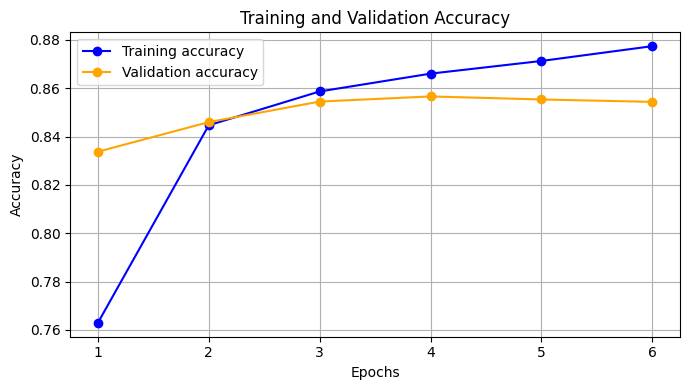

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(7, 4))

plt.plot(epochs, accuracy, color = 'blue', marker='o', label='Training accuracy')
plt.plot(epochs, val_accuracy, color = 'orange', marker='o', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

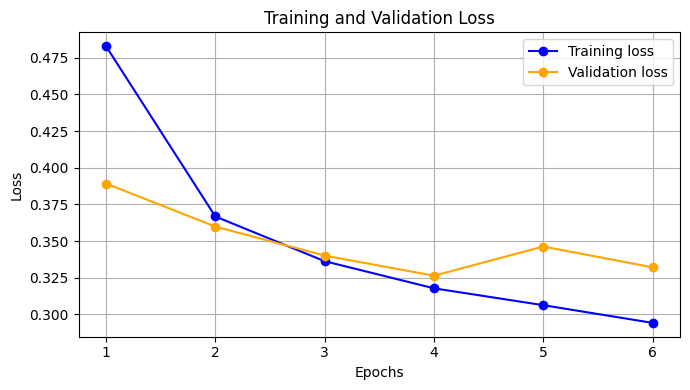

In [ ]:
plt.figure(figsize=(7, 4))

plt.plot(epochs, loss, color = 'blue', marker='o', label='Training loss')
plt.plot(epochs, val_loss, color = 'orange', marker='o', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model.save('LSTM_imdb_model.h5')

c:\Users\subha\OneDrive\Desktop\Gen_AI\RNN\RNNenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('LSTM_imdb_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 114561 (447.50 KB)
Trainable params: 114561 (447.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

313/313 [==============================] - 11s 33ms/step - loss: 0.3115 - accuracy: 0.8668
Test Loss: 0.31145748496055603, Test Accuracy: 0.8668000102043152


In [ ]:
sample_review =X_test[1]

In [ ]:
sample_review

array([ 82,  35,   2,   7,   2,  15,   2, 693, 293, 105,   4, 139,  32,
       468,   2,   2,   8,  61, 523,   5, 520,  35, 321, 547,  18,   4,
       810,  10,  10,  32,   7,   4, 156,  71,  73, 177,   5, 520,  87,
       354,  21,   2,   4,  91, 897,  16,  15,  34,   2,   2,  37, 256,
         4, 217,   7,  35,   2, 532,   2, 785,  20, 323,  24,  64, 122,
        59, 179,   2, 297,   4, 217,   7,   6, 185, 524, 382, 320,  41,
       559,  21,  59,  82, 256,  41,   2,   2,   2, 246,  11, 141,   6,
        96,  15,   4, 311,   2, 442,  64, 320, 622,   5,  53,   2,  17,
         6, 415,  74,  43,   6,   2,   2,  41, 109,   5,   2,   2,   4,
        22, 143,  39, 454,   8, 130,  12, 286, 366,  13, 332,   2,   2,
       733,  15,  13,   2,  59,  16,   2, 153, 154,  33,   4,  58,   7,
         4,  22,  51, 936,  10,  10,  13,   2,   4, 277,  45,   2,  21,
         2,  25, 901, 129, 205,   2,  17,   8,  51, 571,   8,   4, 293,
       105,  10,  10,  17, 160,   2,   2,   2,  81,  24,   2, 52

In [ ]:
len(sample_review.reshape(1,-1))

1

In [ ]:
prediction=model.predict(sample_review.reshape(1,-1))

1/1 [==============================] - 0s 495ms/step


In [ ]:
prediction

array([[0.9923503]], dtype=float32)

In [ ]:
sentiment = "Positive" if prediction[0][0] >= 0.5 else "Negative"
print("Predicted Sentiment:", sentiment)
print("Predicted Score:", prediction[0][0])

Predicted Sentiment: Positive
Predicted Score: 0.9923503


In [ ]:
print("Actual Level:","Positive" if y_test[0]==1 else "Negative")

Actual Level: Positive
